# Investigations on the use of Squared-Root-Mean-Error

Due to the characteristics of the Shallow Ice Approximation (SIA) and the relationship between surface ice velocity (V) and Glen's creep coefficient (A), we're investigating custom loss functions that are suitable to making inversions with Universal Equations (UEs). 

Some of these metrics and their properties are discussed here: https://kourentzes.com/forecasting/wp-content/uploads/2014/12/Kourentzes_Complex-bias.pdf

Here we just attempt to try them out and see how they behave with synthetic data. 

In [58]:
using Statistics, Plots

Let's build a synthetic dataset to explore the behaviour of different metrics

In [1]:
obs = 10.0 .* abs.(randn(100))

100-element Vector{Float64}:
 13.845416102687606
  6.956547828454921
 17.773005591450016
 16.471008851229662
  4.720544404917224
 10.419929121346597
  6.796795152786484
 15.235510215848345
  9.471950441747866
  1.0317010378950628
 16.773560452323764
 17.55789001996039
  4.614055926441068
  ⋮
  1.3831846132427987
  1.5860184683124312
  4.6864814006854845
  1.2980801468535272
 16.835136496078185
  3.2237932976147143
  9.208991316642859
  0.4779178778850548
 20.20639216515483
  5.267897706393158
  0.5424783219068297
  6.145457567178311

In [38]:
preds = [ i/10 .* randn(100) .* obs for i in 1:100 ];

## Absolute-Squared-Mean-Root-Error (ASMRE)

In [43]:
function ASMRE(preds, obs)
    mean((abs.(obs .- preds).^(1/2)))^2
end

ASMRE (generic function with 1 method)

In [40]:
ASMREs = []
for pred in preds
    push!(ASMREs, ASMRE(obs,pred))
end

## Absolute-Power-Mean-Root-Error (APMRE)

In [45]:
function APMRE(preds, obs, power)
    mean((abs.(obs .- preds).^(1/power)))^power
end

APMRE (generic function with 1 method)

Power 4

In [46]:
APMREs_4 = []
for pred in preds
    push!(APMREs_4, APMRE(obs,pred,4))
end

Power 6

In [47]:
APMREs_6 = []
for pred in preds
    push!(APMREs_6, APMRE(obs,pred,6))
end

## Mean-Absolute-Error (MAE)

In [51]:
function MAE(preds, obs)
    mean(abs.(obs .- preds))
end

MAE (generic function with 1 method)

In [52]:
MAEs = []
for pred in preds
    push!(MAEs, MAE(obs,pred))
end

## Root-Mean-Squared-Error (RMSE)

In [53]:
function RMSE(preds, obs)
    mean((abs.(obs .- preds).^2))^(1/2)
end

RMSE (generic function with 1 method)

In [54]:
RMSEs = []
for pred in preds
    push!(RMSEs, RMSE(obs,pred))
end

## Visualizing the differences

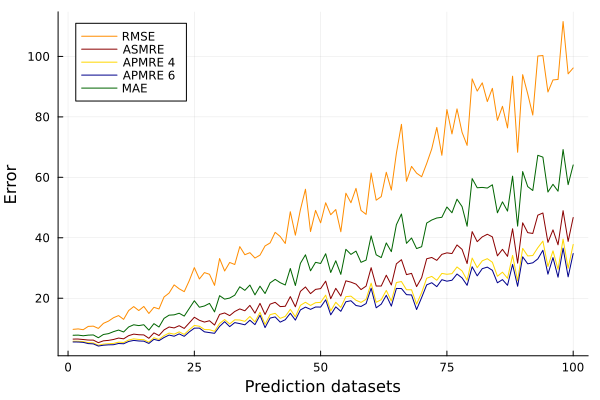

In [57]:
fig = plot(RMSEs, c="darkorange", label="RMSE", legend=:topleft, ylabel="Error", xlabel="Prediction datasets")
plot!(ASMREs, c="darkred", label="ASMRE")
plot!(APMREs_4, c="gold", label="APMRE 4")
plot!(APMREs_6, c="darkblue", label="APMRE 6")
plot!(MAEs, c="darkgreen", label="MAE")